### 1. 載入套件

In [22]:
import pandas as pd                  #用於數據處理和操做
import matplotlib.pyplot as plt     # 用於繪製圖表和視覺化
import seaborn as sns                # 提供更美觀的圖表風格和統計視覺化
import numpy as np                   # 數值計算和陣列操作
import scipy.stats as norm           # 統計分布和函數
from sklearn.preprocessing import StandardScaler   # 數據標準化
from scipy import stats            # 科學計算和統計函數
import warnings                      # 控制警告訊息的顯示與隱藏
warnings.filterwarnings('ignore')    # 忽略警告訊息的顯示
 # 在 Jupyter Notebook 中內嵌繪圖
%matplotlib inline                  

In [23]:
# df_train 為 train.csv 資料
df_train = pd.read_csv(r'E:\DataLearn\1.House\data\train.csv')
# 查看 train.csv 資料欄位有哪些
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 2. 數據頗析

In [24]:
# 查看描述性統計
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

#### 從以上來看，房價最低價格大於0

<Axes: xlabel='SalePrice', ylabel='Density'>

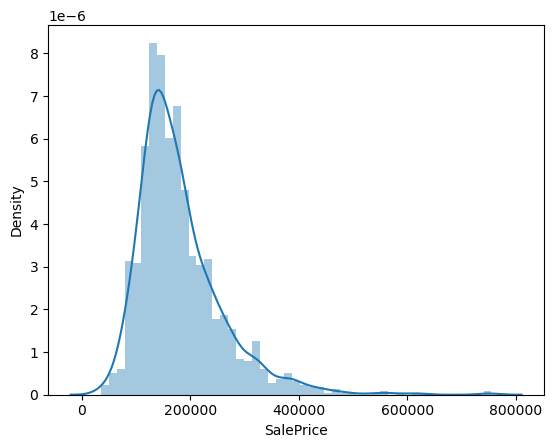

In [25]:
# 繪製房價直方圖來查看查看數據分佈範圍.
# 使用 Seaborn 的 distplot
sns.distplot(df_train['SalePrice'])

#### 以上圖表解讀
* 1.偏離正態分佈。表示數據分佈非左右對稱
* 2.正偏斜度。數據有一些離群值存在
* 3.峰值高

### 查看 偏度 與 峰度

In [26]:
print("偏度 : %f" % df_train['SalePrice'].skew())
print("峰度 : %f" % df_train['SalePrice'].kurt())

偏度 : 1.882876
峰度 : 6.536282


### 探討變數之間的關係

* 1. 先來看看 GrLivArea : 地面之上的面積 與 SalePrice 之間的關係

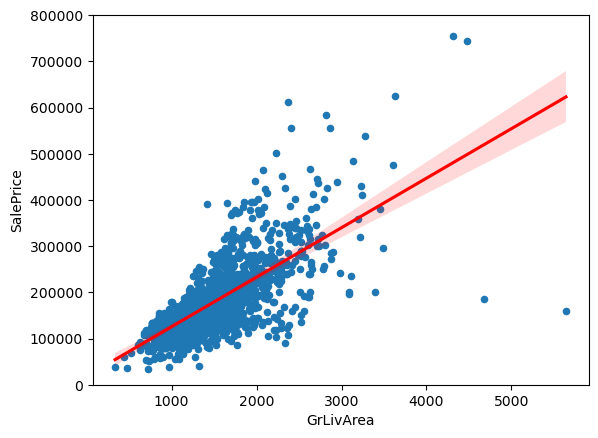

In [30]:
# GrLivArea : 地面之上的面積
# X軸變數
var_1 = 'GrLivArea'
# 使用 SalePrice 與 GrLivArea 生成一個 data
data_1 = pd.concat([df_train['SalePrice'], df_train[var_1]], axis=1)
# ylim => y 軸數字介於 0-80000 之間
data_1.plot.scatter(x=var_1, y='SalePrice', ylim=(0, 800000))
# 加入線性迴歸線。
# scatter=False 參數來指示函數不要在散點圖上繪製散點，只畫出線性迴歸線。
sns.regplot(x=var_1, y='SalePrice', data=data_1, scatter=False, color='r')
plt.show()

> 從以上的圖來看發現，土地面積與售價呈現線性關係，也就是售價與土地面積成正比

* 2. 探討 TotalBsmtSF 地下室總面積 與 售價關係

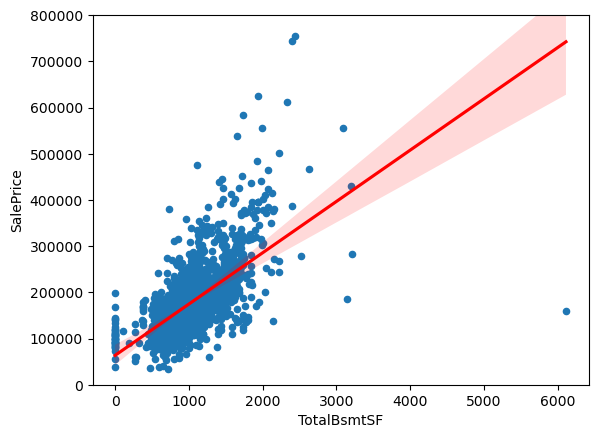

In [34]:
var_2 = 'TotalBsmtSF'
data_2 = pd.concat([df_train['SalePrice'], df_train[var_2]], axis=1)
data_2.plot.scatter(x=var_2, y='SalePrice', ylim=(0, 800000))
sns.regplot(x=var_2, y='SalePrice', data=data_2, scatter=False, color='r')
plt.show()

> 從以上的圖來看發現，地下室面積 與 售價 呈現線性關係，也就是售價與土地面積成正比，而且對比土地面積來說變化更加劇烈

* 3. 觀察 OverallQual 房子整體材料與飾面等級 與 房價關係

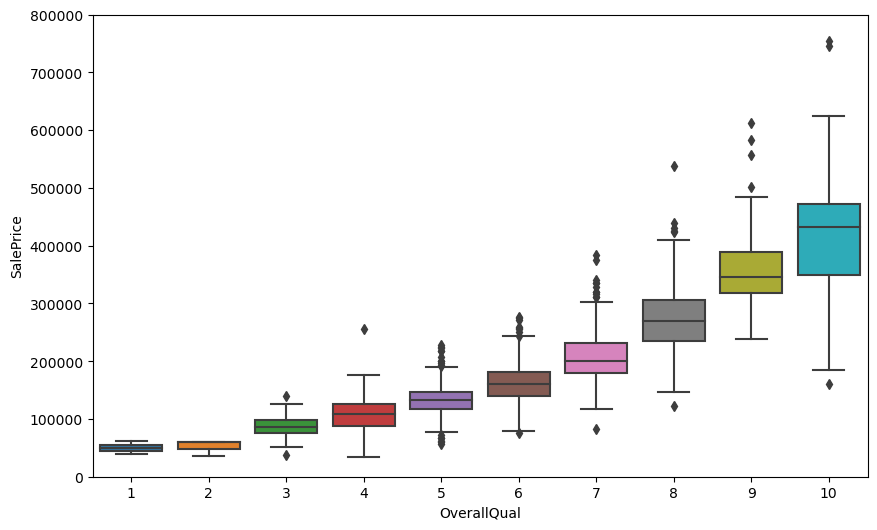

In [40]:
var_3 = 'OverallQual'
data_3 = pd.concat([df_train['SalePrice'], df_train[var_3]], axis=1)
# f 和 ax 是用於表示圖表和子圖的變數。
f, ax = plt.subplots(figsize = (10, 6))
fig_1 = sns.boxplot(x=var_3, y='SalePrice', data=data_3)
fig_1.axis(ymin=0, ymax=800000);

> 可以看到說隨著裝修等級越高，房價坐落區間也會比較高

* 4.YearBuilt 建照年份 與 售價之間的關係

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 [Text(0, 0, '1872'),
  Text(1, 0, '1875'),
  Text(2, 0, '1880'),
  Text(3, 0, '1882'),
  Text(4, 0, '1885'),
  Text(5, 0, '1890'),
  Text(6, 0, '1892'),
  Text(7, 0, '1893'),
  Text(8, 0, '1898'),
  Text(9, 0, '1900'),
  Text(10, 0, '1904'),
  Text(11, 0, '1905'),
  Text(12, 0, '1906'),
  Text(13, 0, '1908'),
  Text(14, 0, '1910'),
  Text(15, 0, '1911'),
  Text(1

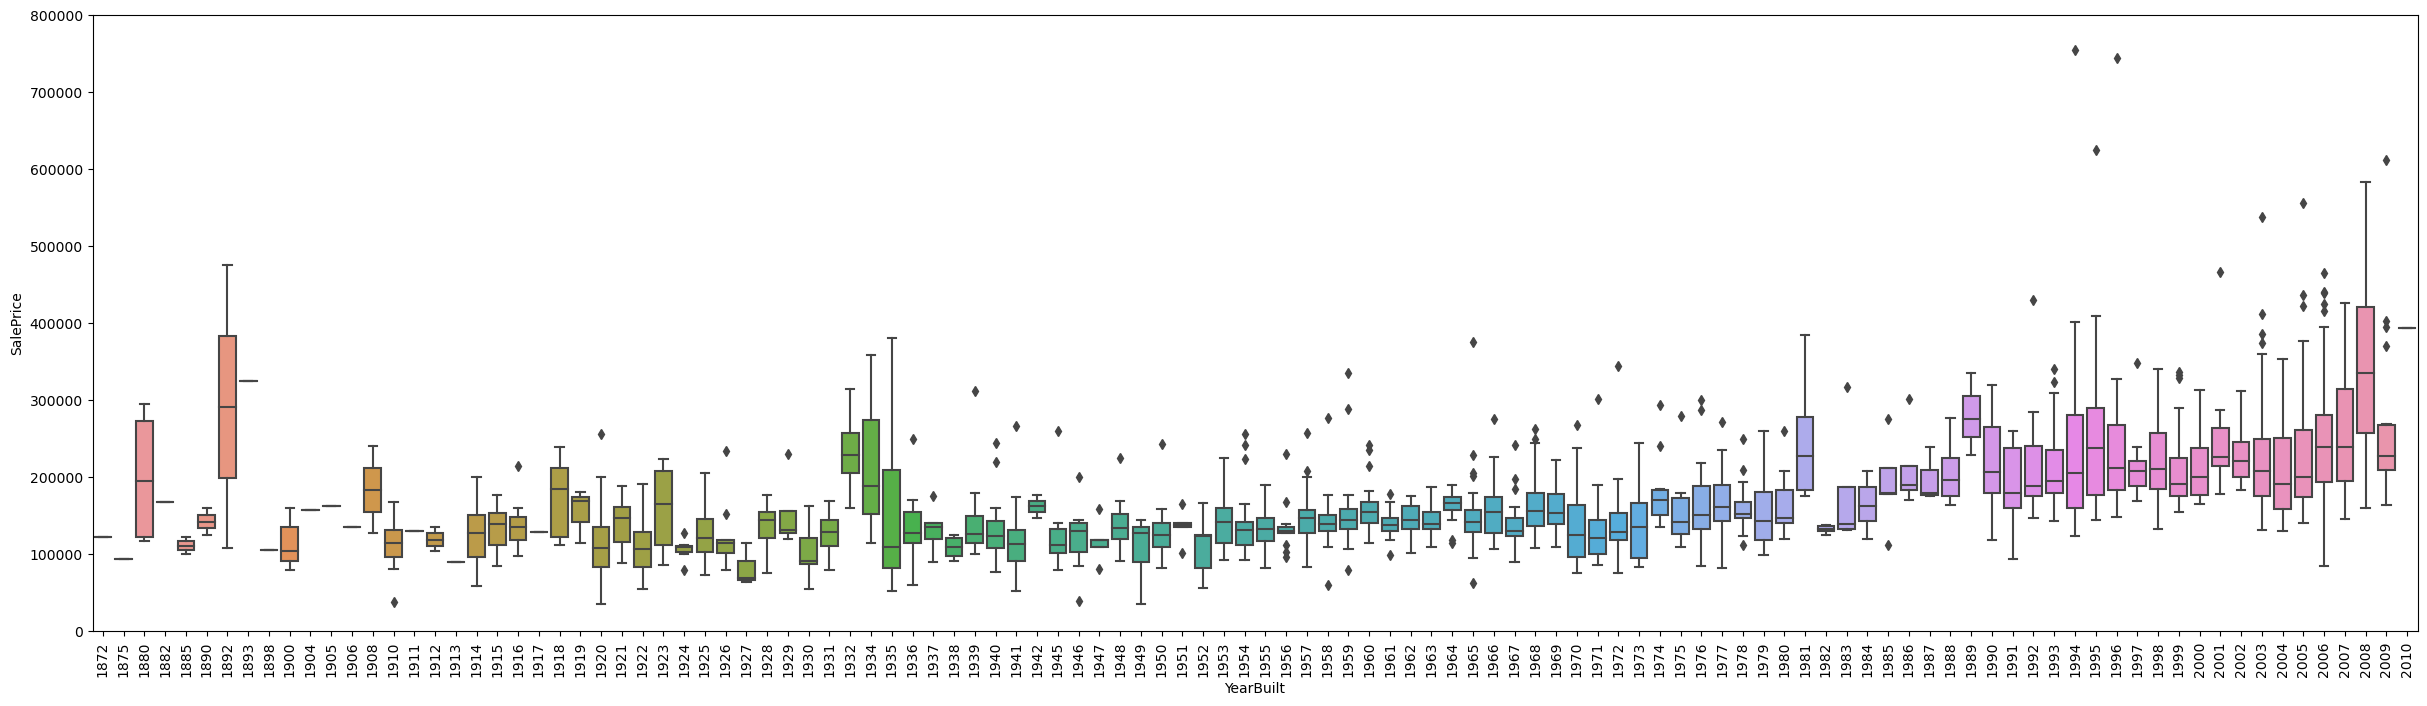

In [45]:
var_4 = 'YearBuilt'
data_4 = pd.concat([df_train['SalePrice'], df_train[var_4]], axis=1)
f, ax = plt.subplots(figsize=(30, 8))
fig_2 = sns.boxplot(x=var_4, y='SalePrice', data=data_4)
fig_2.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

> 根據上面圖表來看，似乎年份月新的物件價值相較於年費較久的更高

### 3. 繪製資料 相關係數矩陣

<Axes: >

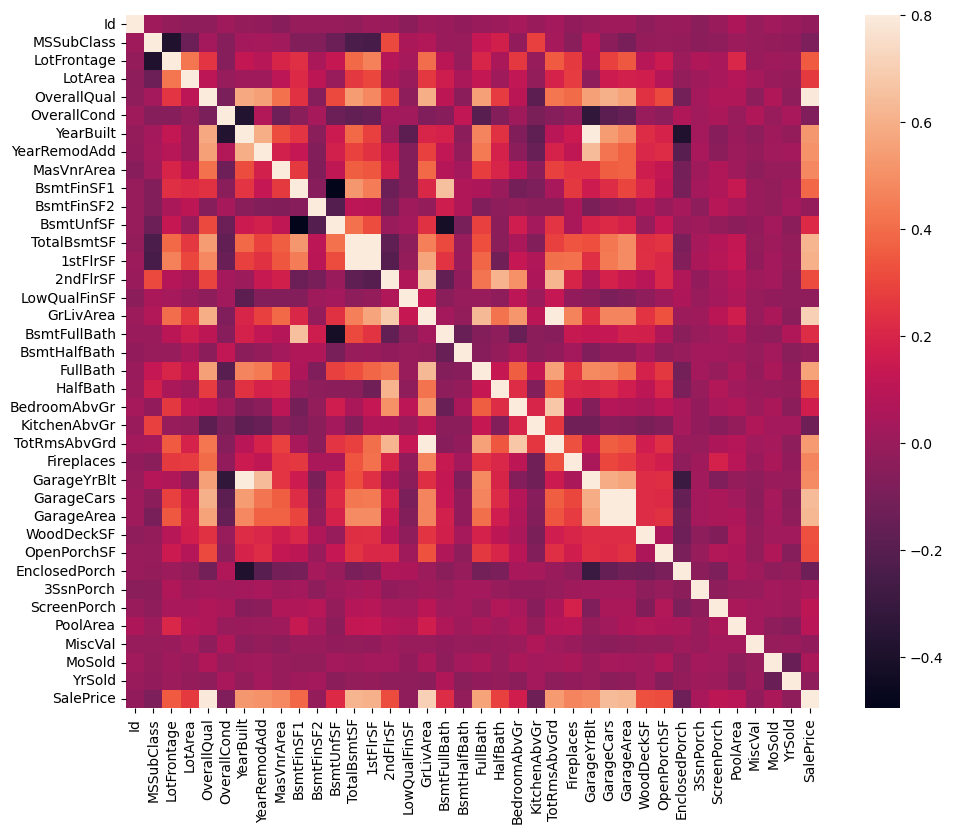

In [46]:
# 計算 df_train 資料裡頭各變數之間相關矩陣
# 相關矩陣介於 -1 ~ 1 數值。 > 0 為正相關， < 0 為負相關
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
# heatmap 創建熱圖像。 vmax=.8 設置了顏色尺度的最大值，square=True 則表示要繪製正方形的熱圖。
# 顏色越淺表示相關性越高
sns.heatmap(corrmat, vmax=.8, square=True)

>從以上可以看到， 'GrLivArea'、'TotalBsmtSF' 和 'OverallQual' 與 SalePrice 都具有正相關，而另外有其他欄位資料也有正相關跡像，也值得去思考其關聯性

### 繪製正相關資料欄位的相關矩陣圖

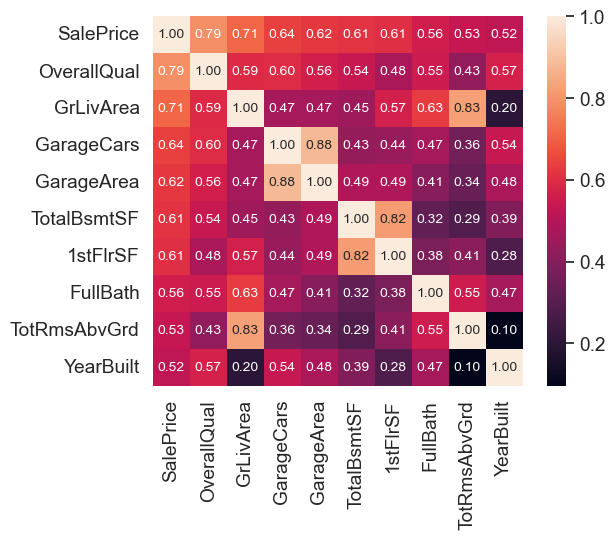

In [51]:
# 設定選擇與 SalePrice 相關係數最高的前 10 個變數
k = 10
# .nlargest 是一個用於選擇數列（Series）中最大值的方法，這裡意思是選10個
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
# cm => 計算相關係數矩陣。 .values.T 轉置變數列方便計算相關係數
cm = np.corrcoef(df_train[cols].values.T)
# 設定熱像矩陣圖裡的字體大小
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,
                 cbar=True,       # 表示在圖上顯示顏色條。
                 annot=True,      # 表示在熱力圖的每個格子中顯示相關係數的數值。
                 square=True,     # 表示將圖形設置為正方形。
                 fmt='.2f',       # 指定數值的格式為小數點後 2 位浮點數。
                 annot_kws={'size': 10},   # 設定了相關係數數值的字體大小。
                 yticklabels=cols.values,   
                 xticklabels=cols.values)
plt.show()